# V. SAI SHRUTHIK (PRASUNET-ML-2)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# The Dataset

In [4]:
# Load the dataset
df = pd.read_csv('C:/Users/natsu/OneDrive/Desktop/PRASUNET/TASK2/Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
# Check for missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [8]:
# Select relevant columns for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Visualize the Data

Text(0.5, 1.0, 'Gender Distribution Percentage')

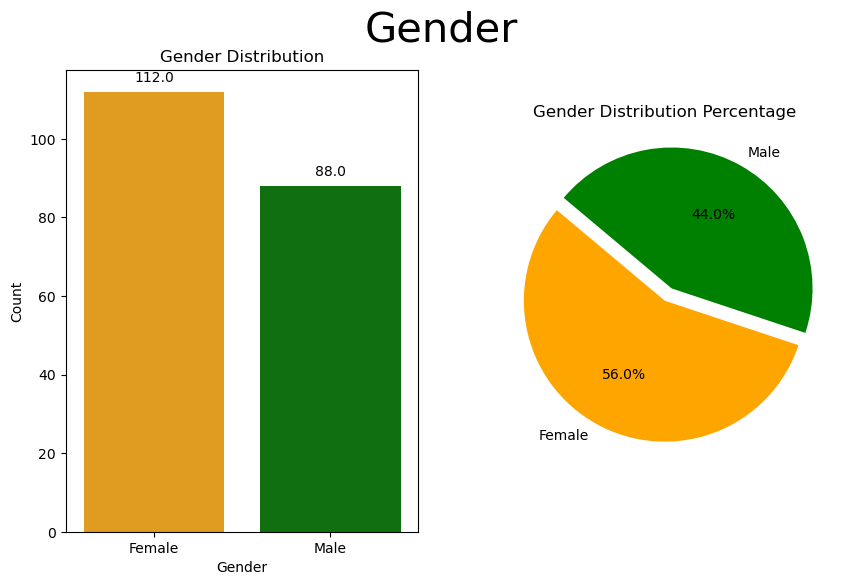

In [10]:
# Visualize the Distribution of the Gender

# Calculate the gender distribution
gender_counts = df['Gender'].value_counts()
total_counts = gender_counts.sum()
gender_percentages = (gender_counts / total_counts) * 100

# Define custom colors for orange and green
custom_colors = ['orange', 'green']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Gender', fontsize=30)

# Bar plot with custom colors
bars = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=custom_colors, ax=ax1)
ax1.set_title('Gender Distribution')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')

# Add value labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    ax1.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# Pie chart with percentages and custom colors, exploded smaller piece
explode = [0.1 if pct == gender_percentages.min() else 0 for pct in gender_percentages]
ax2.pie(gender_percentages, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=custom_colors)
ax2.set_title('Gender Distribution Percentage')

Text(0.5, 1.0, 'Annual Income vs Spending Score')

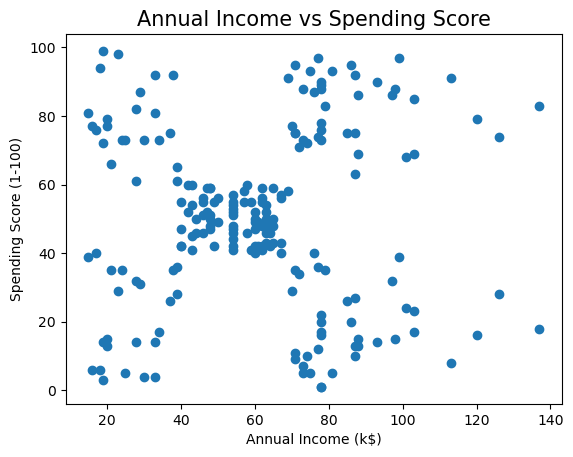

In [11]:
#Scatter plot between annual income vs spending score
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score', fontsize=15)

Text(0.5, 1.0, 'Age vs Spending Score')

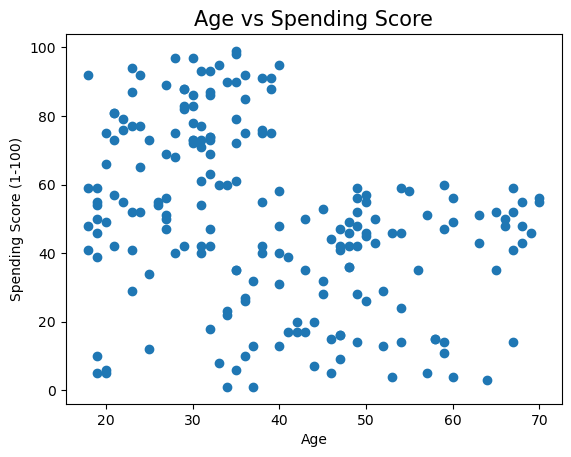

In [12]:
#Scatter plot between age vs spending score
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score', fontsize=15)

# Standardization

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model 

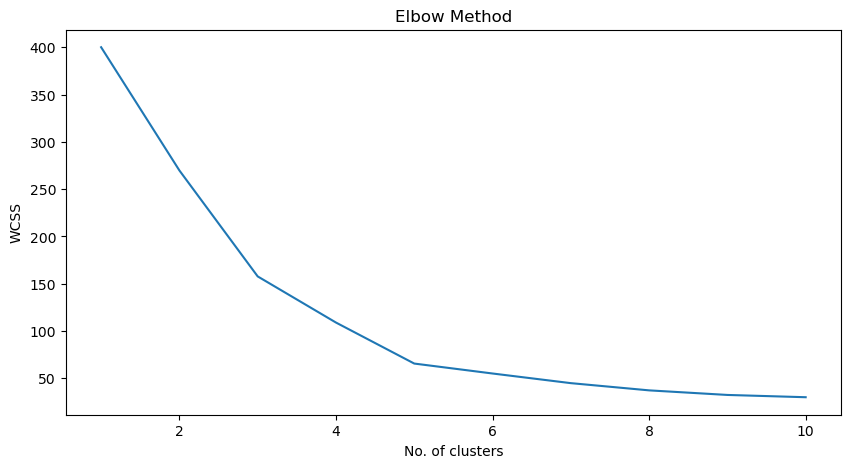

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# From the Elbow method, assume the optimal number of clusters is 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Cluster

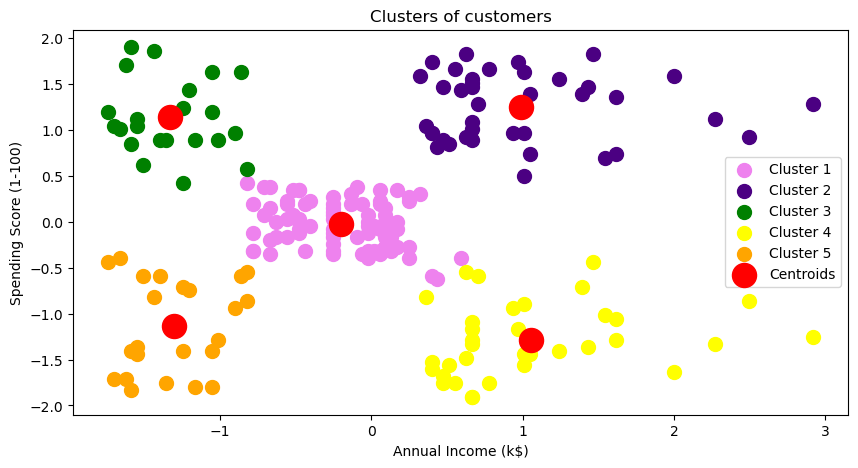

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='violet', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='indigo', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='yellow', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='orange', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()